In [18]:
import math
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# #StatsForEngineers - Theory

1. Summary Statistics

2. Deviation Measures

3. Measuring Distributions

4. Mergability and Robustness

# (1) Summary Statistics

Problem statment:

Given a dataset X:

* Characterize the distribution in one or two values
* Characterization should be robust, i.e. not severly affected by single outliers

Equivalent of an elevator pitch for a data sets.


## The Mean Value

The _mean value_ of $X=[x_1, \dots, x_n]$ is defined as

$$ \mu = mean(X) = \frac{1}{n} \sum_{i=1}^n x_i. $$

- Represnets center of mass
- If the values are close together this is a good representative
- Can be easily affected by outliers

In [19]:
# Computation of the mean value

def mean(X):
    return float(sum(X)) / len(X)

## Medians

A _median value_ for $x_1, \dots, x_n$ is number $m$ such that
  
 $$ \# \{ i \,|\, x_i \lt m \} = \# \{ i \,|\, x_i \gt m \}. $$

So the number of samples smaller than $m$ is equal to the number of samples larger than $m$.
(Both should be roughly $n/2$).
  
Remark:

* A Median always exists
* Median is not always unique
* Very robust to outliers
* Less "precise" then the mean for well behaved datasets

# The central median

Medians can be computed by sorting the dataset.

`S = sorted(X)`

Consider the following cases:

- if `len(X)` is odd, then `S[(len(X)-1)/2]` is the (unique and) central median.
- if `len(X)` is even, then all values between `S[len(X)/2-1]` and `S[len(X)/2]` are median values.  
  The central median is defined as the mean of those two values.

We write $median(X)$ for the central median of $X$.

Example:
* `median([1,2,3]) = 2`
* `median([1,2]) = (1 + 2) / 2`

In [20]:
# Computation of the median
def median_range(X):
    S = sorted(X)
    n = len(X)
    lower_mid = int(math.floor((n-1)/2.))
    upper_mid = int(math.ceil((n-1)/2.))
    return (S[lower_mid], S[upper_mid])

def median(X):
    a,b = median_range(X)
    return (a+b)/2

### Challenge

Just like the mean value, medians can be computed in linear time.

Can you find the algorithm?

Hint: Start with a quicksort.

In [21]:
def plot_median_range(X):
    plt.figure(figsize=(14,1))
    a, b = median_range(X)
    c = (a+b)/2.
    sns.rugplot(X, color="green", height=0.5)
    plt.plot([a,a],[0.5,1],'r-')
    plt.plot([b,b],[0.5,1],'r-')
    plt.plot([c,c],[0.5,1],'r-')
    plt.plot([a,b],[0.5,0.5],'r--')
    plt.title("Median Range: {:.3f} .. {:,.3f}".format(a,b))
    plt.ylim([0,1])

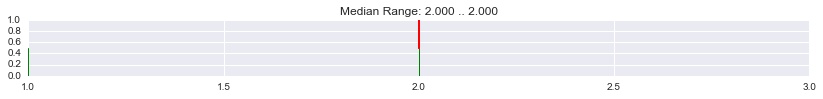

In [22]:
plot_median_range([1,2,3])

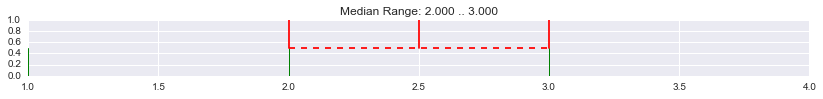

In [23]:
plot_median_range([1,2,3,4])

# Truncated Means

* Truncated means "interpolate" between means and medianse.
* In many cases they provid the increased "precision" of means, while keeping the robustnes against outliers.

To arrive at the k-truncated mean of a dataset X, perform the following steps:
* Remove a minimum and a maximum value from X, a total of k times.
* The remaining samples are called the k-truncation of X and denoted by $T_k X$.
* Caculate the mean value of the remaining samples.

We deonte the k-truncated mean by `tmean(X,k)`.

In [24]:
def tmean(X,k):
    X = list(X)
    k = int(k)
    if len(X) <= 2*k:
        return None
    for i in range(k):
        X.remove(max(X))
        X.remove(min(X))
    return mean(X)

In [25]:
# Truncated mean examples
print tmean([1,2,3,5,100],0)
print tmean([1,2,3,5,100],1)
print tmean([1,2,3,5,100],2)

22.2
3.33333333333
3.0


In [83]:
# Plot
def mark(m,height=1,style='r'):
    plt.plot([m,m],[0,height],style)

def plot_mean_median(X):
    plt.figure(figsize=(14,1))
    sns.rugplot(X, color='grey', height=0.5)
    mark(mean(X));                     print "mean:        {:4.2f} (red)".format(mean(X))
    k = int(math.ceil(10*len(X)/100.))
    mark(tmean(X,k), style='b');       print "tmean(X,{:2}): {:4.2f} (blue)".format(k,tmean(X,k))
    mark(median(X), style='g');        print "median:      {:4.2f} (green)".format(median(X))
    plt.show()

mean:        0.10 (red)
tmean(X,50): 0.09 (blue)
median:      0.05 (green)


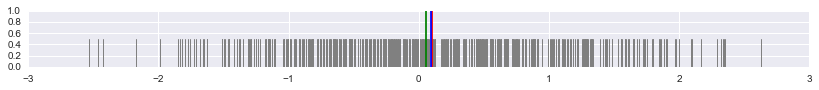

mean:        1316.31 (red)
tmean(X, 8): 1315.61 (blue)
median:      1399.66 (green)


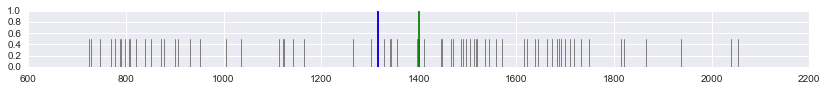

mean:        45.77 (red)
tmean(X,10): 30.52 (blue)
median:      29.10 (green)


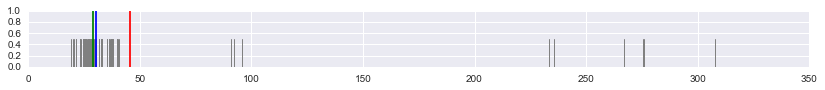

In [84]:
# Normally distributed data
Z = [ np.random.normal() for x in range(500) ]
plot_mean_median(Z)

# Mean value of some request rates
X = np.loadtxt("DataSets/RequestRates.csv", delimiter=",")[:,1]
plot_mean_median(X)

# Request Latency Dataset
Y = np.genfromtxt("DataSets/WebLatency.csv", delimiter=",")[:,2][0:500] - 85
plot_mean_median(Y[0:100])

mean:        41.60 (red)
tmean(X, 1): 35.00 (blue)
median:      3.00 (green)


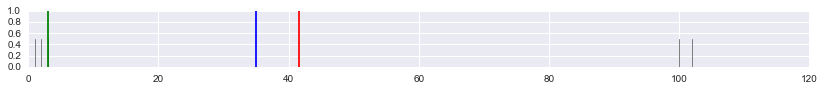

In [30]:
# Mean values can be atypical
plot_mean_median([1,2,3,100,102])


# Mean and Median Values in Monitoring

* Spike Erosion in Graphs [demo](https://demo-hh2.circonus.com/trending/graphs/view/6944e456-b711-e532-def1-b92c8a118898#set-OqHjffwi)
* Request latency mean values can be missleading [demo](https://demo-hh2.circonus.com/trending/graphs/view/359c41b6-025e-656f-d490-e5548191033b)
* Rolling and windowed means as smoothing techniques [demo](https://demo-hh2.circonus.com/trending/graphs/add)

# (2) Deviation Measures

Goal measure "typical" deviation form a central value.

1. The _maximal deviation_ is defined as

   $$ maxdev(X) = max \{ |X[i] - \mu| \,|\, i=1,\dots,n\}.$$

2. The _mean absolute deviation_ is defined as
   
   $$ mad(X) = \frac{1}{n} \sum_{i=1}^n |X[i] - \mu|.$$

3. The _standard deviation_ is defined as

   $$ \sigma(X) = stddev(X) =  \sqrt{\frac{1}{n} \sum_{i=1}^n (X[i] - \mu)^2}.$$

4. The _inter quartile range_ is defined as difference of the 75- and 25-Percentile:

   $$ IQR(X) = P(75,X) - P(25,X) $$

Properties:
* Measure the 'typical' displacement from the mean value.
* Standard deviation is popular because it has extremely nice mathematical properties.
* The IQR is very robust to outliers.

In [31]:
def max_dev(X):
    m = mean(X)
    return max(abs(x - m) for x in X)

def mad(X):
    m = mean(X)
    return sum(abs(x - m) for x in X) / float(len(X))

def stddev(X):
    m = mean(X)
    return math.pow(sum((x - m)**2 for x in X) / len(X), 0.5)

def IQR(X): return percentile(75,X) - percentile(0.25,X)

# computation of percentiles is given below

In [32]:
# Plotting helper function
def plot_mean_dev(X, m, s, new_canvas=True):
    print "center    = ", m
    print "deviation = ", s
    if new_canvas: plt.figure(figsize=(14,1))
    sns.rugplot(X, color='grey', height=0.5)
    plt.plot([m,m],[0,1],'r-' )
    plt.plot([m-s,m-s],[0,1],'b-')
    plt.plot([m+s,m+s],[0,1],'b-')
    plt.plot([m-s,m+s],[0.5,0.5],'b--')
    if new_canvas: plt.show()

Maximal deviation
center    =  0.0994650556128
deviation =  2.63265757082


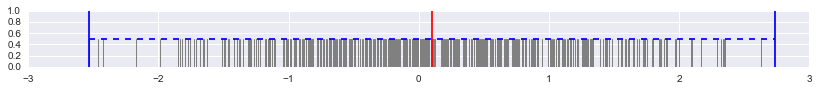

Standard Deviation
center    =  0.0994650556128
deviation =  0.954918342285


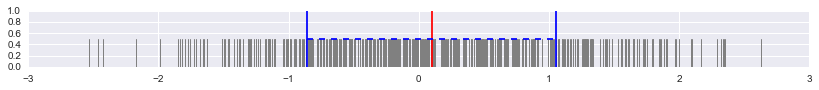

Mean Absolute Deviation
center    =  0.0994650556128
deviation =  0.779523036406


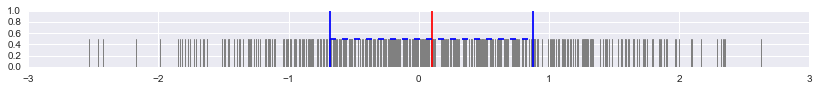

Median IQR
center    =  0.0541148890544
deviation =  1.61999449286


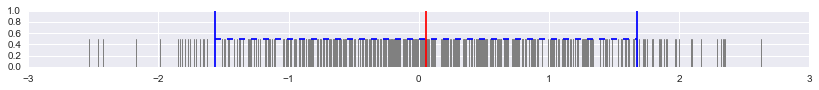

In [85]:
# Standard deviation is a good deviation for normal distributed data

print "Maximal deviation"
plot_mean_dev(Z,mean(Z),max_dev(Z))

print "Standard Deviation"
plot_mean_dev(Z,mean(Z),stddev(Z))

print "Mean Absolute Deviation"
plot_mean_dev(Z,mean(Z),mad(Z))

print "Median IQR"
plot_mean_dev(Z,median(Z),IQR(Z)/2)

Maximal deviation
center    =  1316.30863471
deviation =  738.072957089


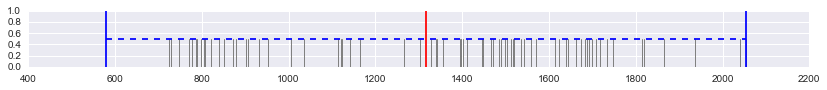

Standard Deviation
center    =  1316.30863471
deviation =  374.572363954


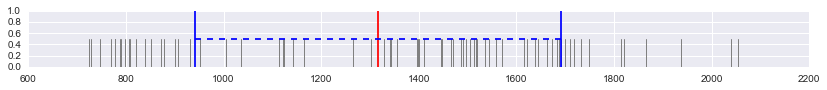

Mean Absolute Deviation
center    =  1316.30863471
deviation =  327.4656915


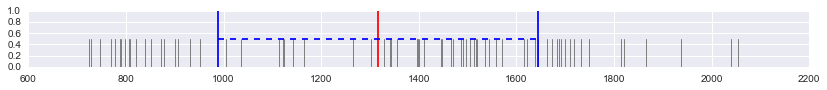

Mean Median IQR
center    =  1399.66320801
deviation =  452.709228516


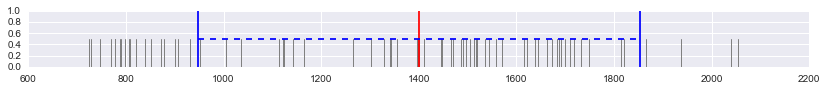

In [86]:
X = np.loadtxt("DataSets/RequestRates.csv", delimiter=",")[:,1]
    
print "Maximal deviation"
plot_mean_dev(X,mean(X),max_dev(X))

print "Standard Deviation"
plot_mean_dev(X,mean(X),stddev(X))

print "Mean Absolute Deviation"
plot_mean_dev(X,mean(X),mad(X))

print "Mean Median IQR"
plot_mean_dev(X,median(X),IQR(X)/2)

Maximal deviation
center    =  47.9512
deviation =  1175.0488


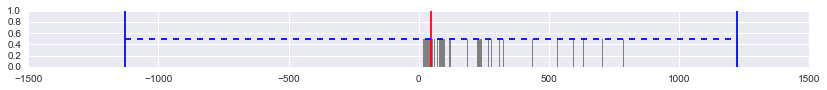

Standard Deviation
center    =  47.9512
deviation =  92.4618512607


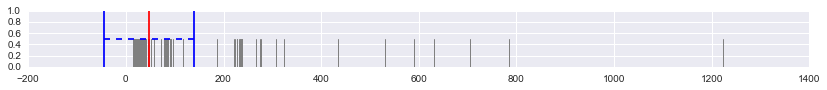

Mean Absolute Deviation
center    =  47.9512
deviation =  34.9059744


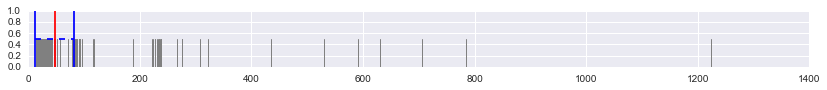

Mean Median IQR
center    =  28.2
deviation =  9.5


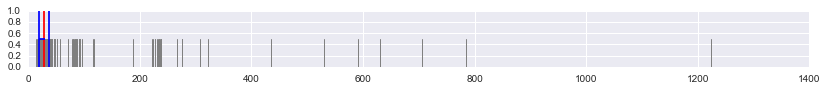

In [87]:
print "Maximal deviation"
plot_mean_dev(Y,mean(Y),max_dev(Y))

print "Standard Deviation"
plot_mean_dev(Y,mean(Y),stddev(Y))

print "Mean Absolute Deviation"
plot_mean_dev(Y,mean(Y),mad(Y))

print "Mean Median IQR"
plot_mean_dev(Y,median(Y),IQR(Y)/2)

## Caution with Standard Deviation

- Everybody Learns about standard deviation in school
- Beautiful mathematical properties!
- Everybody knows 
  - "68% of data falls within 1 std-dev of the mean"
  - "95% falls within 2 std-dev of the mean"
  - "99.7" falls within 3 std-dev of the mean"
* "Problem is: this is utter nonsense". Only true for normally distributed data.

* Not good for measuring outliers!


_Source:_ Janert - Data Analysis with Open Source Tools

## War Story:

- Looking at SLA for DB response times
- Outlier defined as value larger than $\mu + 3\sigma$
- Look at code: Takes '0.3' percentile!
- So always have outliers.
- And 0.3-percentile was way too large (hours of latency).
- Programmer changed code for 1%, 5%, 10% quantiles.
- Finally handcoded a threshold
- The SLA was never changed

Source: Janert - Data Analysis with Open Source Tools

# Tukey's outlier Definition

A k-outlier is a data point X which is either

* larger than `P(75) + k * IQR(X)` or
* smaller than `P(25) - k * IQR(X)`.

An outlier (without k) is an 1.5-outlier.

In [34]:
def outliers(X, k=1.5):
    iqr = IQR(X)
    lower_bound = percentile(25,X) - k * iqr
    upper_bound = percentile(75,X) + k * iqr
    out = []
    for x in X:
        if x < lower_bound: out.append(x)
        if x > upper_bound: out.append(x)
    return out

In [35]:
def outlier_plot(X):
    plt.figure(figsize=(14,2))
    sns.rugplot(X, color="green", height=0.5)
    a,b = percentile(25,X), percentile(75,X)
    O = outliers(X)
    print "IQR:", b-a
    print "Outlier count:", len(O)
    mark_range(a,b)
    for o in O:
        plt.plot([o,o],[0.7,0.8],'b--')
    plt.ylim([0,1])

IQR: 1.38359374912
Outlier count: 0


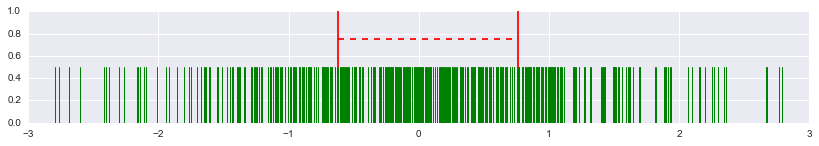

In [57]:
# Normal Data
outlier_plot(Z)

IQR: 725.891693115
Outlier count: 0


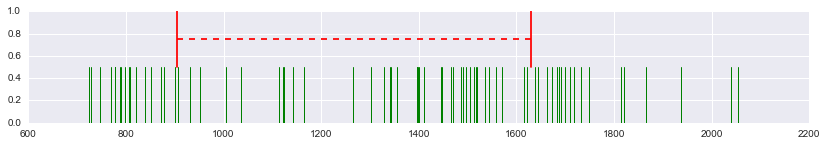

In [58]:
# Web request Rates
outlier_plot(X)

IQR: 11.2
Outlier count: 22


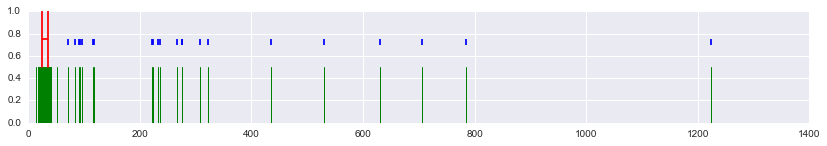

In [59]:
# Request Latencies
outlier_plot(Y)

# Tukey's Boxplots

Show:

* Median
* Box around 0.25 and 0.75 Quantiles
* "whiskers" from min to max
* points for outliers

Allows visual clues:

* Where is the data concentracted?
* How far is it spread?
* How skew is the data?

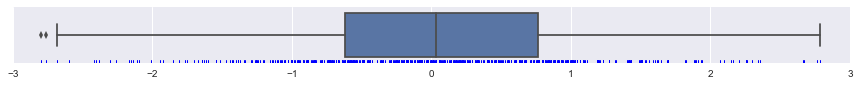

In [63]:
# Normal Data
plt.figure(figsize=(15,1))
sns.boxplot(x=Z, vert=False)
sns.rugplot(Z)
plt.show()

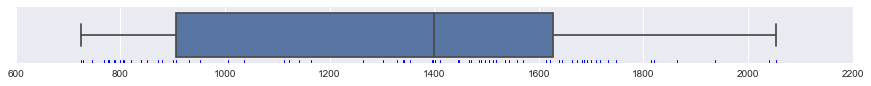

In [61]:
# Tukey Boxplots show outliers as 'points' outside the whiskers

# Web-request dataset
plt.figure(figsize=(15,1))
sns.boxplot(x=X)
sns.rugplot(X)
plt.show()

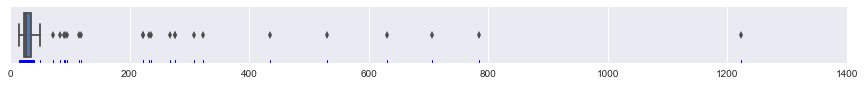

In [62]:
# Latency Dataset
plt.figure(figsize=(15,1))
sns.boxplot(x=Y, vert=False)
sns.rugplot(Y)
plt.show()

Demo:
- Global duration percentiles with Overlays: [demo](https://demo-hh2.circonus.com/trending/graphs/view/9e85beb8-4658-49f5-95e8-b6cf70ad5ca9#set-YVlpVTrN)
- Latency percentiles in CAQL [demo](https://demo-hh2.circonus.com/trending/graphs/edit/da4ac22a-55b9-6145-abbc-a0371919e876)

# Outlier Scores

The intuitive meaning of outlier is a value in a dataset, that is "unlikely" to be generated by the same process as the rest of the distribution.

A simple outlier score:

* Pick a summary statistic $M$: E.g. mean
* Pick a deviation measure $D$: E.g. MAD

The outlier score of a value $x$ in context $X$ is defined as:

$$OutlierScore(X,y) = \frac{M(X) - y}{S(X)}$$

It measures how many deviations a sample is away from the mean.

* Good for well behaved datasets with a single mode
* Problematic for skew distributions
* Easy to use in practice

Demo:
- Outlier Detection in Time Series https://demo-hh2.circonus.com/trending/graphs/view/c7602466-69f4-e6b3-ceae-95049da417c4
- Time range: August 30th - September 7th 2015

# Deviations Measures in Monitoring

- It's useful to enrich line graphs by deviation measures (e.g. percentile aggregation)
- Jitter (demo?)
- Outlier detection in generated revenue [demo](https://demo-hh2.circonus.com/trending/graphs/edit/c7602466-69f4-e6b3-ceae-95049da417c4)

## Takeaway

* Don't use the standard-deviation if you can avoid it
* If you need a deviation measure use MAD or IQR:
  - (+) Simple to calculate
  - (+) Simple to interpret
  - (-) Not mergable

# (3) Measuring Distributions

* Classical summary statistics good for describing the body of the distribution
* Need information about the tail of the distributions, e.g. for writing good SLAs
* Determine outliers in a dataset

## Inverse Percentiles

The inverse percentile y of a dataset $X$, is defined as:

$$ IP(y, X) = \text{(the percentage of samples in X that are lower than $y$)} = \# \{ i \, | \, x_i \leq y \} / \# X \cdot 100 $$

**Properties**

* $0 \leq IP(y, X) \leq 100$, dimensionless percentage value
* $IP(y,X)$ is monotonically increasing in $y$

In [37]:
def IP(y,X):
    lower_count = 0
    for x in X:
        if x <= y: lower_count += 1
    return float(lower_count) / len(X)

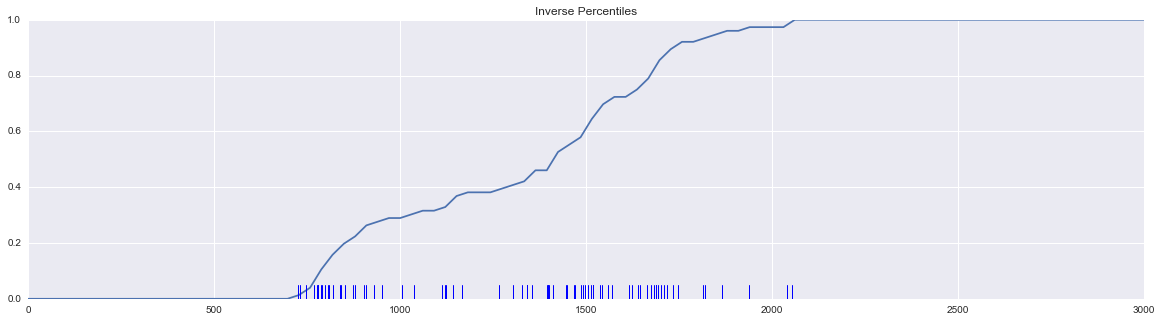

In [38]:
# Example
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15,5)
X = np.loadtxt("DataSets/RequestRates.csv", delimiter=",")[:,1]

grid = np.linspace(0,3000,100)
plt.figure(figsize=(20,5))
plt.plot(grid, [IP(y,X) for y in grid])
plt.title("Inverse Percentiles")
sns.rugplot(X)

# Inverse Percentiles in Monitoring

* Inverse Percentiles to Monitor SLAs (overlay)
* count_lower can be used to compute the number of offended users (slides)

# Percentiles

* Complement or Inverse to Inverse Percentiles:
  - IP: The ratio of samples was below a value $y$ was $?\%$
  - Percentile: 90% of all queries where faster than $?$

* The definition is a little involved so cover examples first

Examples:

* The minimum is a 0%-percentile
* A median is a 50%-percentile
* The maximum is a 100%-percentile
* Quartiles: $0,25,50,75,100$-percentiles
* Quantiles: The $r$-quantile is the $r*100$-percentile $0<r<1$.

# General Definition of Percentiles

Pick a number $0\leq p \leq 100$. A $p$%-percentile for $X$ is a value $y$ such that,

$$ \#\{i \,|\, X[i] \lt y \} \leq \frac{p}{100} \cdot n $$

and

$$ \#\{i \,|\, X[i] \gt y \} \leq \frac{100-p}{100} \cdot n $$

Roughly speaking, $y$ divides $X$ in $p\%$ samples that are lower than $y$ and $(100-p)\%$ samples that are larger than $y$.

Example:
<figure>
<img src="img/latency_percentile.png" style="width:500px">
</figure>

Remarks:

* Quantiles always exists
* Non unique (like median)
* Lot's of ways to choose a quantile function, i.e. interpolate between $s_a$ and $s_b$ cf.  
  http://en.wikipedia.org/wiki/Quantile#Estimating_the_quantiles_of_a_population

In [88]:
# Computation of Quantiles
def percentile_range(p,X):
    q = p/100.0
    S = sorted(X)
    n = len(X)
    upper_d = int(math.ceil(q * (n + 1)))
    lower_d = int(math.floor(q * (n + 1)))
    # edge cases
    if upper_d == 0:   upper_d = 1
    if upper_d == n+1: upper_d = n
    if lower_d == 0:   lower_d = 1
    if lower_d == n+1: lower_d = n
    return (S[lower_d-1], S[upper_d-1])

def percentile(p,X):
    a,b = percentile_range(p,X)
    return (a+b)/2 # mid point percentile. One choice!

In [89]:
def mark_range(a,b):
    plt.plot([a,a],[0.5,1],'r-')
    plt.plot([b,b],[0.5,1],'r-')
    plt.plot([a,b],[0.75,0.75],'r--')

def plot_percentile_range(p,X):
    plt.figure(figsize=(14,2))
    sns.rugplot(X, color="green", height=0.5)
    a,b = percentile_range(p,X)
    mark_range(a,b)
    plt.title("{:n}%-Percentile Range: {:.3f} .. {:,.3f}".format(p, a,b))
    plt.ylim([0,1])

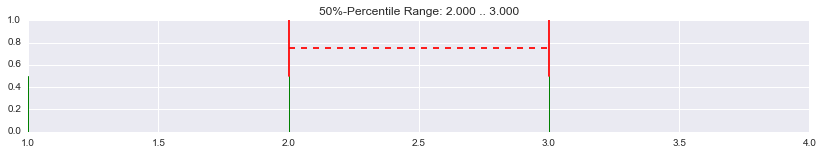

In [90]:
plot_percentile_range(50,[1,2,3,4])

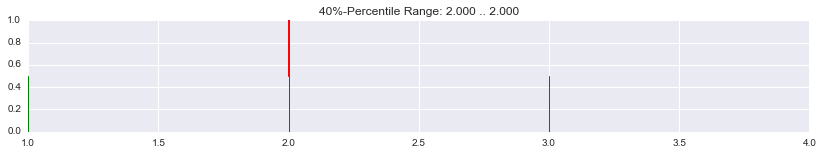

In [91]:
plot_percentile_range(40,[1,2,3,4])

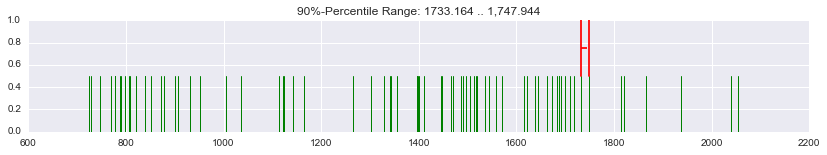

In [92]:
plot_percentile_range(90,X)

# (4) Histograms

* Basic Idea: Use area to compare sample ratios, instead of point counts
* Easier to answer questios like: "How many voters are older than 30, when presented with a histogram, than a table or a rugplot."
* Both a visualization method and a data-storage format

# Building your own Histogram

1. Define value range of histogram `bin_min`, `bin_max`
2. Divide range into bins `bin[k], ..., bin[k]`
3. The bins may have variying width 
4. Count the number of samples in each bin `sample_count[k]`
5. Draw a rectangle for each bin with height:
   - `h[k] = sample_count[k]` -- non normalized 
   - `h[k] = sample_count[k] / bin_width[k]` -- normalized case

In [69]:
import numpy as np
X = np.loadtxt("DataSets/RequestRates.csv", delimiter=",")[:,1]

# Step 1: Represent bins via list of left-edges
bin_left = [
    500, 700, 800, 900, 1000, 1500, 1800, 2000, 2200
]

bin_min = bin_left[0]
bin_max = bin_left[-1]
bins = [ [bin_left[i-1],bin_left[i]] for i in xrange(1, len(bin_left)) ]

print "Bins: ", bins

Bins:  [[500, 700], [700, 800], [800, 900], [900, 1000], [1000, 1500], [1500, 1800], [1800, 2000], [2000, 2200]]


In [70]:
# Step2: Count number of samples in bins
def count(X, bins):
    def findBin(x, bins):
        for i, bin in enumerate(bins):
            left, right = bin
            if left <= x and x < right:
                return i
        return None
    
    count = [0] * len(bins)
    for x in X:
        i = findBin(x, bins)
        if i != None:
            count[i] += 1

    return count

sample_count = count(X, bins)

print "Counts:", sample_count

Counts: [0, 10, 8, 4, 25, 23, 4, 2]


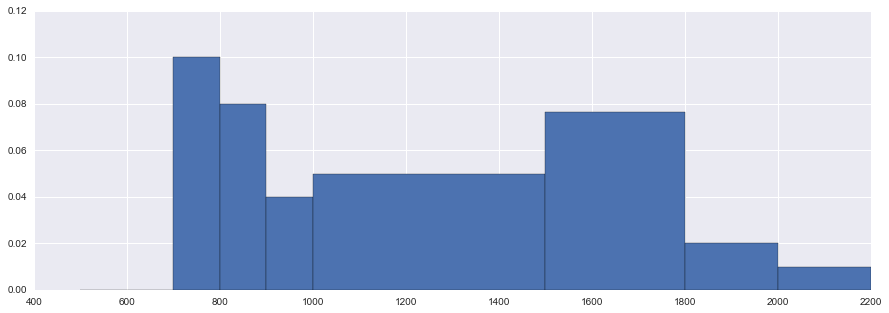

In [71]:
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# Step3: Plot bar chart
def my_hist(X, bins, normed=True, **kwargs):
    bin_left = [ l for l, r in bins ]
    bin_width = [ r-l  for l,r in bins ]
    bin_height = [ 
        float(c) / w if normed else c 
        for c,w in zip(count(X, bins), bin_width)
    ]
    plt.bar(bin_left,width=bin_width,height=bin_height, **kwargs)

plt.figure(figsize=(15,5))
my_hist(X,bins)

In [72]:
def plot_hist(X,  bin_min, bin_max, bin_width):
    plt.figure(figsize=(15,5))
    bins =[ [i, i+bin_width] for i in np.arange(bin_min, bin_max, bin_width) ]
    my_hist(X,bins)
    print "Histogram with bin_width ", bin_width
    plt.show()

## How bin choices affect the apperance

Histogram with bin_width  5


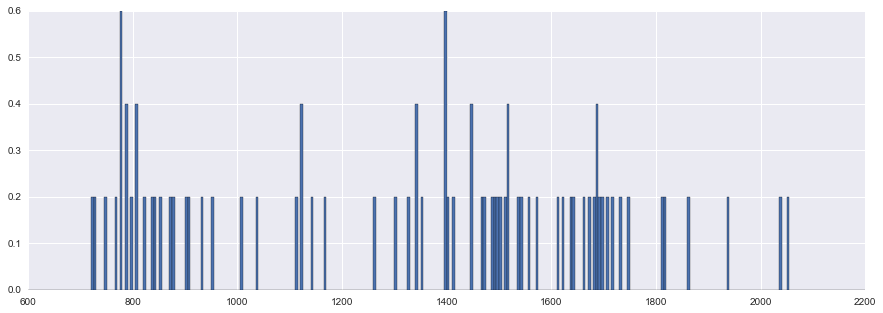

In [73]:
bin_min = 600
bin_max = 2200
plot_hist(X, bin_min, bin_max, 5)

Histogram with bin_width  50


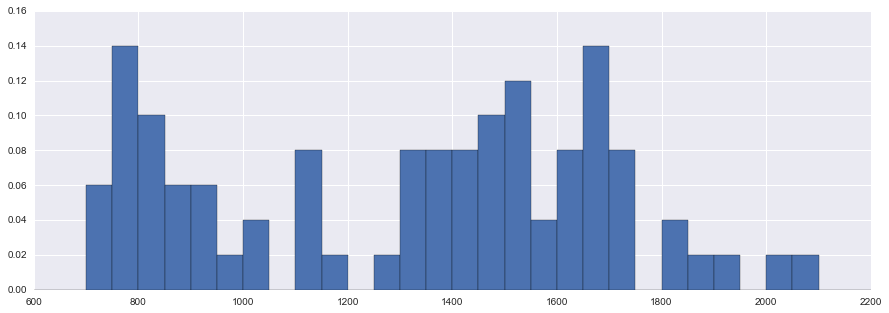

In [74]:
plot_hist(X, bin_min, bin_max, 50)

Histogram with bin_width  2000


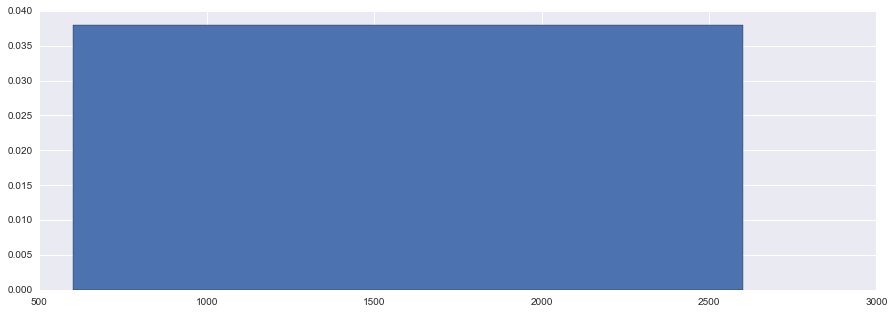

In [75]:
plot_hist(X, bin_min, bin_max, 2000)
# -> Only the total count is displayed

## Common bin-width choices

Remarks:
* Can convert `bin_count` and `bin_width` using relation $$ bin\_max - bin\_min = bin\_count \cdot bin\_width.$$

* Choices `bin_min=min(X)` and `bin_max=max(X)` are common. But: dependence on input data.

Choices for bin-width:

* Excel: Let $n$ be the number of samples, then:

  $$ bin\_count = \sqrt{n} $$

* Scott's normal reference rule

  $$ bin\_width = \frac{3.5 \sigma}{n^{1/3}} $$

  where $\sigma$ is the standard deviation (cf. later).
  This is optimal for random samples of normally distributed data, in a certain sense.

* Freedman–Diaconis rule

  $$ bin\_width = \frac{2 IQR}{n^{1/3}} $$
  
  where IQR is the inter-quartile range (cf. later). Like Scott's rule but more robust agains outliers.



# A pragmatic choice: HDR Histograms

Example: A decimal HDR Histogram with precision=2 has bin boundaries:
  
    .... 1.0,  1.1,  1.2, ... 1.9,  2.0,  2.1, ...., 9.9; --- bin width = 0.1
         10.0, 11.0, 12.0 ... 19.0, 20.0, 21.0 ...., 99 ; --- bin width = 1
         ...

** Properties: **
* Captures large part of float range
* Bin boundaries do not depend on data! -> Can aggregate counts!
* Bin width increase with growing values
* Allows compact memory representation
* Implementation available at http://hdrhistogram.org/

In [76]:
import math
def HDR_bin_width(x):
    if x == 0: return 0
    sign = x / abs(x)
    return sign * 10 ** ( math.floor(math.log10(abs(x)) - 1 ) )

def HDR_bin_left(x):
    w = HDR_bin_width(x)
    if w == 0: return 0
    return math.floor(x / w) * w

def HRD_bin_right(x):
    return bin_left(x) + bin_width(x)

In [77]:
def HDR_hist(X):
    count = {}
    for x in X:
        l = HDR_bin_left(x)
        count[l] = count.get(l,0) + 1
    bin_left = sorted(count.keys())
    bin_width = [ HDR_bin_width(l) for l in bin_left ]
    bin_height = [ abs(count[l] / HDR_bin_width(l))
        for l in bin_left
    ]
    plt.figure(figsize=(15,5))
    plt.bar(bin_left,width=bin_width,height=bin_height)

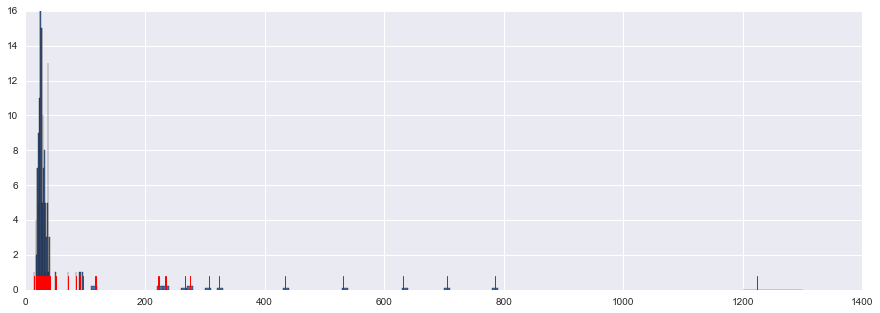

In [78]:
Y = np.genfromtxt("DataSets/WebLatency.csv", delimiter=",")[:,2][:200] - 85
HDR_hist(Y)
sns.rugplot(Y, color="red")

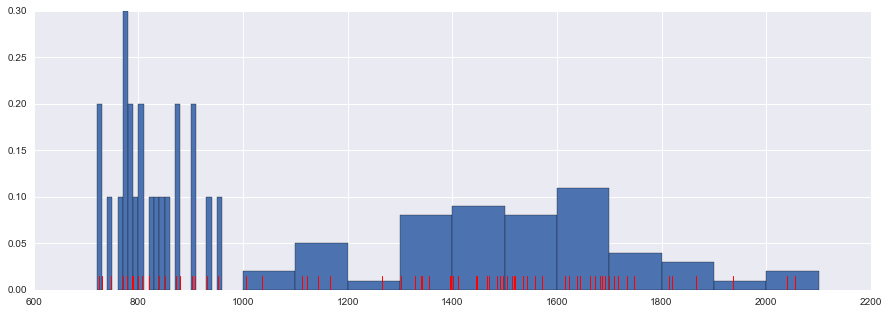

In [79]:
HDR_hist(X)
sns.rugplot(X, color="red")

(0, 200)

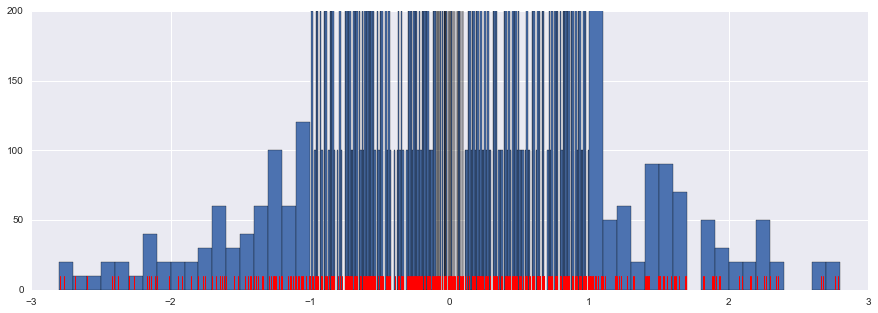

In [80]:
# Need re-binning near zero:
HDR_hist(Z)
sns.rugplot(Z, color="red")
plt.ylim(0,200)

# (5) Mergability

A summary statistic $S$ assigns (one or many) values to a dataset $X$. (E.g. mean value.)

Let $X$ and $Y$ be two datasets of size $len(X)=n$ and $len(Y)=m$.
Denote the merged dataset by 

$$X .. Y = [X[1],...,X[n], Y[1],...,Y[m]].$$

A summary statistic is _mergable_ if there is an algorithm that computes $S(X..Y)$ from $S(X)$ and $S(Y)$.

Example:
- The sum is mergable: $sum(X..Y) = sum(X)+sum(Y)$.

References: [Agrawal, et. al. - Mergeable Summaries (pdf)](https://www.cs.utah.edu/~jeffp/papers/merge-summ.pdf)

Exerciese:
- Show that the maximum is mergable
- Show that the median value is not mergable

# Mergability in Monitoring: Rollups

It's a common practice in monitoring to rolled-up data to different time periods.

Example:
- raw data arrives every second at monitoring agent
- the raw data is rolled-up into 1-minute aggregates at the agent and sumbitted downstream 
- the 1-minute data is then further rolled-up into 5-minute aggregates
- the 5-minute aggregates are rolled-up into 1h aggregates

There are two resons for that practice:
- Graphing Performance. Large time range graphs can be constructed from the stored aggregates.
- Storage costs. Many tools delete the one-minute data eventually and only the aggregates for historic data.

For this proceedure to make sense you need either:
- Store all your raw data
- Use mergable summaries

# Mergability in Monitoring: Service Level Metrics

When monitoring distributed systems, it's common to have many nodes being dedicated to a single service.
Service level metrics, that measure properties of the whole system are of great interested for operations and accounting.

Examples of service level metrics include:
- Total requests served
- Latency Percentiles
- Average peer lags

To collect those service level metrics we need to either:

- Stream raw data to a central location and compute the metric there (e.g. statsd, logstash) -> Slow, expensive
- Use __mergable summaries__ (e.g. total request counts) that can be computed locally and merged downstream

# Mean values are not mergable (on the nose)

The summary statistic $S(X)=mean(X)$ is not mergable.

Proof: Assume contrary that mean is mergable, then there is a computable function $f$ so that:
* `X=[0], Y=[1]; mean(X..Y)=0.5`, hence `f(0,1)=0.5` and
* `X=[0,0,0], Y=[1]; mean(X..Y)=0.2`, hence `f(0,1)=0.2`

A contradition.

# The mean values can be enriched to a mergable summary

With a little trick, we can pimp up the mean statistic to something mergable.

For two datasets $X,Y$ of length $n,m$, we can compute the mean value of the merged dataset as follows:

$$mean(X..Y) = \frac{n}{n+m} \cdot mean(X) + \frac{m}{n+m} \cdot mean(Y)$$

This shows, that the summary statistic $S(X)=(len(X),mean(X))$ is mergable.

Remarks:

* Expressions of the form $\sum w_i X[i]$, with $\sum w_i = 1$ are called _weighted means_.

* Exercise: How do you aggregate a greater number of sample sets: $X_1, ..., X_k$ ?

In [81]:
# Test
print "RHS", mean([1,2,3,10,11])
print "LHS", (3*mean([1,2,3]) + 2*mean([10,11]))/5

RHS 5.4
LHS 5.4


# Median values are not mergable!

Neither the weighted mean nor the median of medians are the median of the total sample set.

# Mergability of Deviation Measures

* The standard deviation is mergable.  
  More precisely the statistic $S(X)=(len(X),mean(X),stddev(X))$ is mergable.
  
  Hint: Reduce to the case that `T(X)=(len(X),sum(X),sum([x^2 for x in X]))` is mergable.

* Neither max-deviation nor MAD are mergable on the nose.

# Histograms: The Ulitmate Mergable Summary

* HDR Histograms as Summary Statistic:  
  The value on a dataset $X$ is the sequence of bin,count pairs:  
  `H(X) = [(bin_1, count_1), ..., (bin_n, count_n)]`
  
  E.g. `H([1,2,101,102]) = [(1,1),(2,1),(100,2)]`
  
* Hisotgrams are mergable: Just add the counts.

* All summary statistics and deviations measures can be approximated from Histograms:  
  - mean, standard deviation
  - min, max
  - percentiles, median
  
Example: [demo](https://demo-hh2.circonus.com/trending/graphs/edit/b4b3bce1-ce5b-418f-a8eb-adfa369a6bed)

# Overview Monitoring Statistics

```
| Type         | Statistics     | Robust | Mergable |
|--------------|----------------|--------|----------|
| Central      | mean           | no     | yes      |
|              | median         | yes    | no       |
|              | truncated mean | yes    | no       |
|--------------|----------------|--------|----------|
| Deviation    | stddev         | no     | yes      |
|              | mad            | ~      | no       |
|              | IQR            | yes    | no       |
|--------------|----------------|--------|----------|
| Distribution | Percentile     | yes    | no       |
|              | Histogram      | yes    | yes      |
```